# Springboard Data Science Career Track Unit 4 Challenge (Tier 3)

## Objectives
Solve the following question: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!



A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

The four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading

#### 1.1. Importing Libraries

In [60]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
The data is from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [61]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset contains the Average prices of the houses in the Excel file in a sheet name 'Average Price'
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None, skiprows=[1])

### 2. Cleaning, transforming, and visualizing

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

**2.1. Exploring your data** 

In [62]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            303 non-null    datetime64[ns]
 1   City of London        303 non-null    float64       
 2   Barking & Dagenham    303 non-null    float64       
 3   Barnet                303 non-null    float64       
 4   Bexley                303 non-null    float64       
 5   Brent                 303 non-null    float64       
 6   Bromley               303 non-null    float64       
 7   Camden                303 non-null    float64       
 8   Croydon               303 non-null    float64       
 9   Ealing                303 non-null    float64       
 10  Enfield               303 non-null    float64       
 11  Greenwich             303 non-null    float64       
 12  Hackney               303 non-null    float64       
 13  Hammersmith & Fulham

In [63]:
properties = properties.rename(columns={'Unnamed: 0':'Date'})

* Column 1: City of London is not part of 32 boroughs
* Column 2 through 33: London boroughs
* Column 35 and 36: designations Inner or Outer London which the boroughs belong
* Column 38 through 46: regions of England

**2.2. Subsetting**


In [64]:
j = [0]+list(range(2, 33))
london_boroughs = properties.iloc[:,j]

london_designations = properties.iloc[:,[0,35,36]]

j = [0]+list(range(38, 46))
england_regions = properties.iloc[:,j]

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [65]:
x=london_boroughs.melt(id_vars='Date', var_name='Borough', value_name='Avg Price')
x['Avg Price'] = x['Avg Price'] / 1e6

In [66]:
print(x.head())
x.groupby('Borough').median()

        Date             Borough  Avg Price
0 1995-01-01  Barking & Dagenham   0.050460
1 1995-02-01  Barking & Dagenham   0.051086
2 1995-03-01  Barking & Dagenham   0.051269
3 1995-04-01  Barking & Dagenham   0.053134
4 1995-05-01  Barking & Dagenham   0.053042


,Avg Price
Borough,
Barking & Dagenham,0.163821
Barnet,0.305077
Bexley,0.194017
Brent,0.264329
Bromley,0.257048
Camden,0.446897
Croydon,0.212185
Ealing,0.270345
Enfield,0.226748


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

In [67]:
x.loc[x.Borough == 'Sutton',:]

,Date,Borough,Avg Price
8181,1995-01-01,Sutton,0.071537
8182,1995-02-01,Sutton,0.070893
8183,1995-03-01,Sutton,0.070307
8184,1995-04-01,Sutton,0.069412
8185,1995-05-01,Sutton,0.069759
...,...,...,...
8479,2019-11-01,Sutton,0.374775
8480,2019-12-01,Sutton,0.372581
8481,2020-01-01,Sutton,0.372145
8482,2020-02-01,Sutton,0.373843


To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

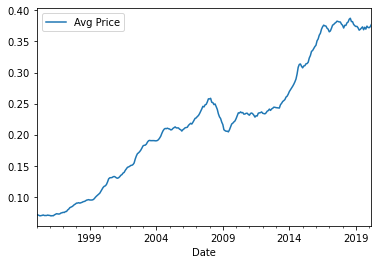

In [68]:
x.loc[x.Borough == 'Sutton',:].plot(x='Date',y='Avg Price')

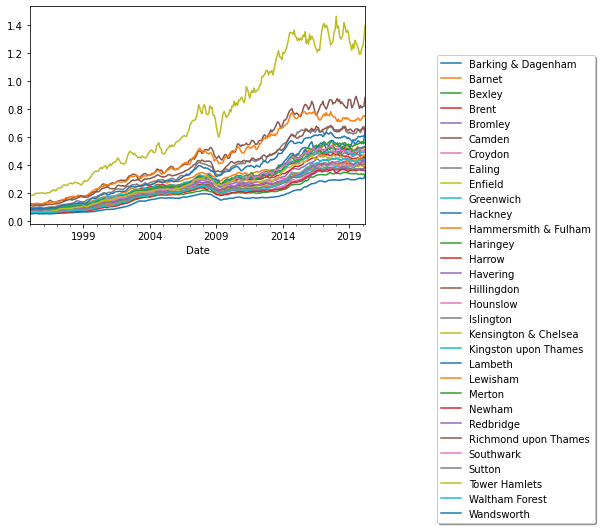

In [73]:
x.pivot(index='Date',columns='Borough',values='Avg Price').plot().legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

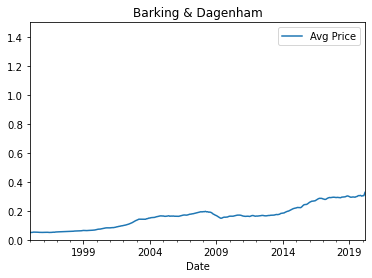

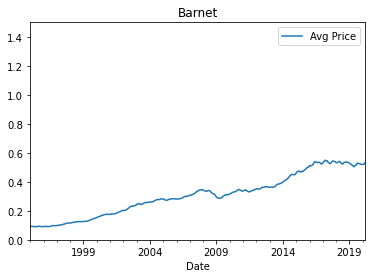

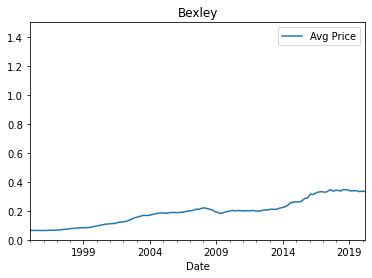

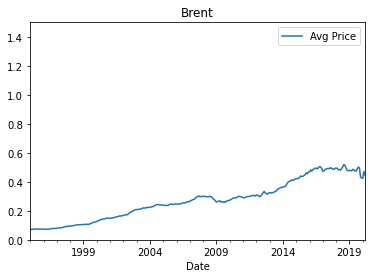

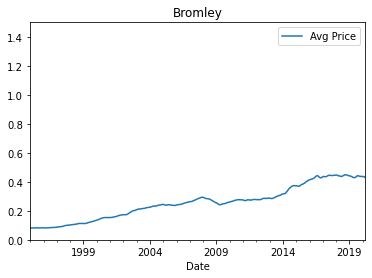

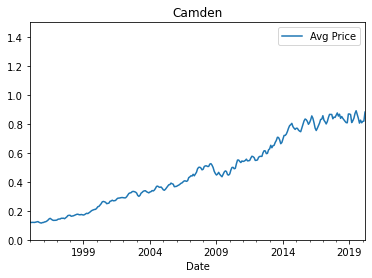

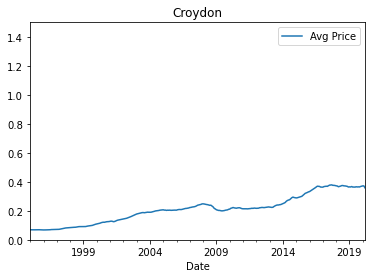

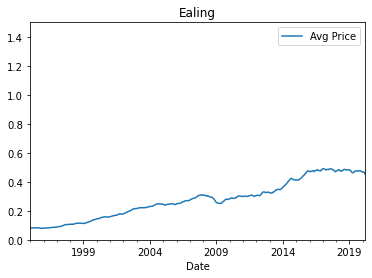

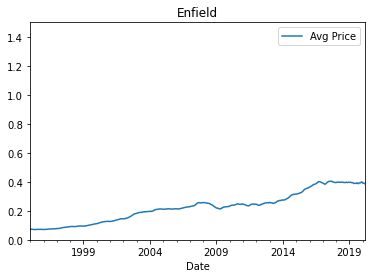

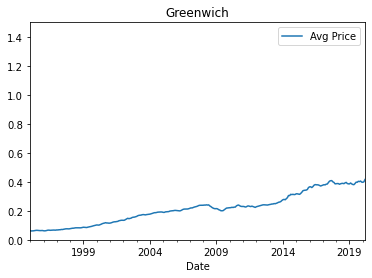

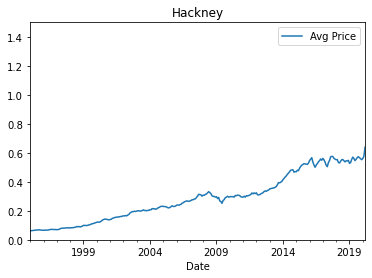

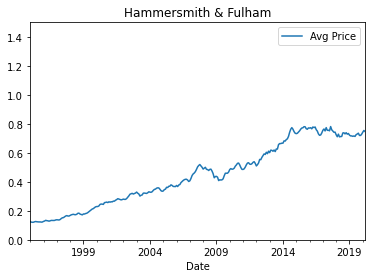

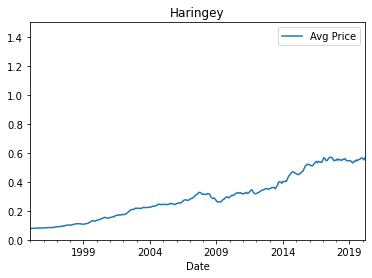

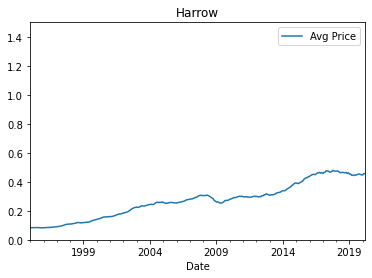

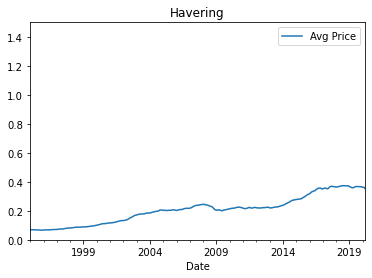

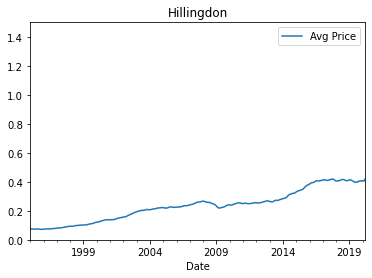

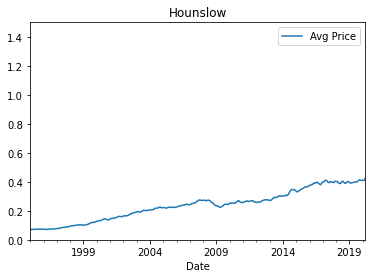

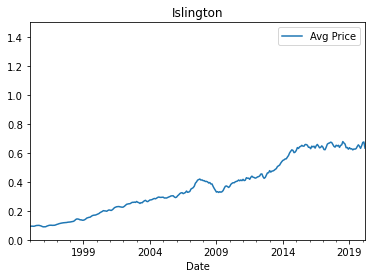

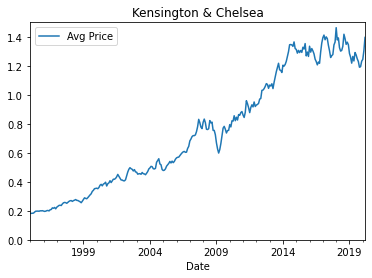

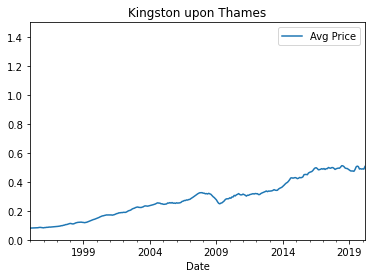

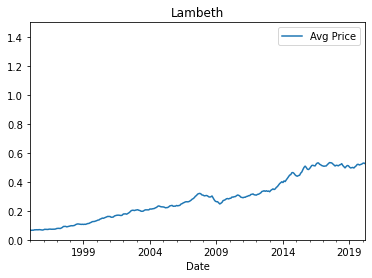

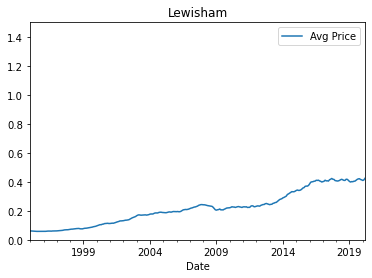

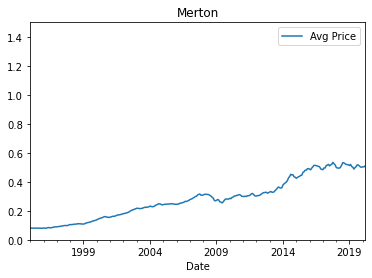

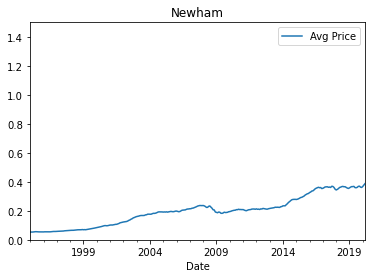

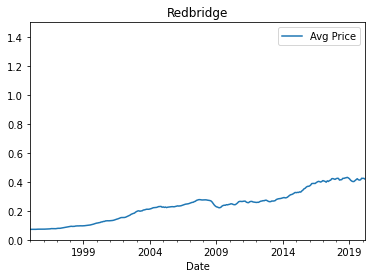

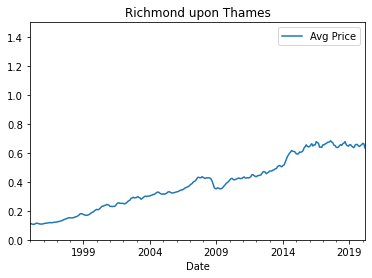

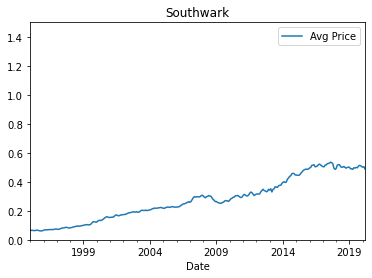

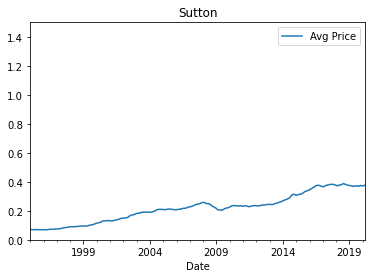

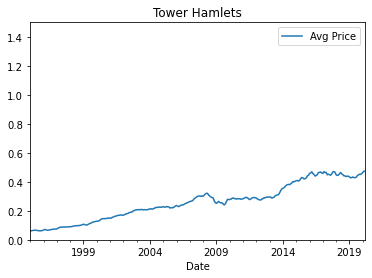

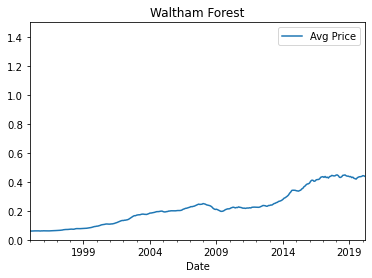

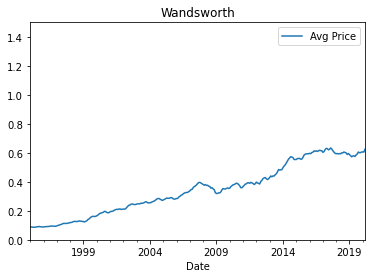

In [74]:

for borough in x.Borough.unique():
    x.loc[x.Borough == borough,:].plot(x='Date',y='Avg Price',title=borough).set_ylim([0,1.5])
    plt.show()

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 